In [ ]:
pip install plotly

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/research-1/dataset 1/Dataset_Heart_Disease.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1048 non-null   int64  
 1   age                  1048 non-null   int64  
 2   sex                  1048 non-null   int64  
 3   chest pain type      1048 non-null   int64  
 4   resting bps          1048 non-null   int64  
 5   cholesterol          1048 non-null   float64
 6   fasting blood sugar  1048 non-null   int64  
 7   resting ecg          1048 non-null   int64  
 8   max heart rate       1048 non-null   int64  
 9   exercise angina      1048 non-null   int64  
 10  oldpeak              1048 non-null   float64
 11  ST slope             1048 non-null   int64  
 12  target               1048 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 106.6 KB


In [ ]:
data.shape


(1048, 13)

In [ ]:
data.head()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195.0,0,0,122,0,0.0,1,0


In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

EDA

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1048.0,53.325382,9.397822,28.0,46.0,54.0,60.0,77.0
sex,1048.0,0.734733,0.441686,0.0,0.0,1.0,1.0,1.0
chest pain type,1048.0,2.817748,1.118649,1.0,2.0,3.0,4.0,4.0
resting bps,1048.0,132.613550,17.367605,92.0,120.0,130.0,140.0,200.0
cholesterol,1048.0,245.172710,57.101359,85.0,208.0,239.0,275.0,603.0
fasting blood sugar,1048.0,0.162214,0.368823,0.0,0.0,0.0,0.0,1.0
resting ecg,1048.0,0.606870,0.763313,0.0,0.0,0.0,1.0,2.0
max heart rate,1048.0,142.918893,24.427115,69.0,125.0,144.0,162.0,202.0
exercise angina,1048.0,0.368321,0.482579,0.0,0.0,0.0,1.0,1.0
oldpeak,1048.0,0.942366,1.100429,-0.1,0.0,0.6,1.6,6.2


In [ ]:
data.nunique()

age                     49
sex                      2
chest pain type          4
resting bps             63
cholesterol            221
fasting blood sugar      2
resting ecg              3
max heart rate         109
exercise angina          2
oldpeak                 43
ST slope                 4
target                   2
dtype: int64

In [ ]:
for col in data.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {data[col].nunique()} unique value")

age has 49 unique value
sex has 2 unique value
chest pain type has 4 unique value
resting bps has 63 unique value
cholesterol has 221 unique value
fasting blood sugar has 2 unique value
resting ecg has 3 unique value
max heart rate has 109 unique value
exercise angina has 2 unique value
oldpeak has 43 unique value
ST slope has 4 unique value
target has 2 unique value


In [ ]:
# Function for insighting summary information about the column

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(data[col].isnull().sum()/data.shape[0]*100, 2))
    print("num_of_nulls   : ", data[col].isnull().sum())
    print("num_of_uniques : ", data[col].nunique())
    print(data[col].value_counts(dropna = False))

In [ ]:
first_looking("target")

column name    :  target
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
0    528
1    520
Name: target, dtype: int64


0    528
1    520
Name: target, dtype: int64


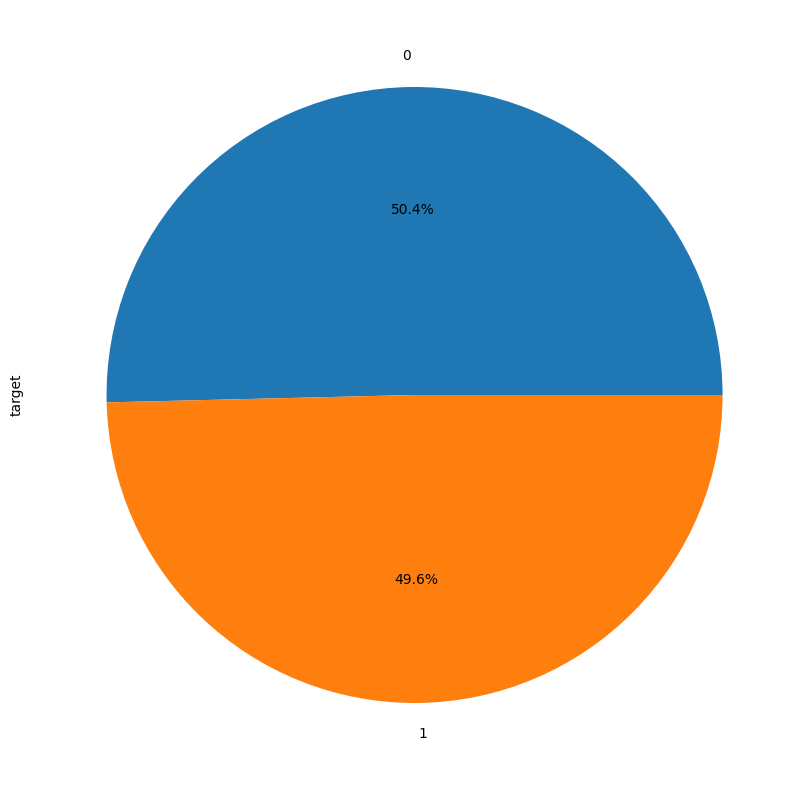

In [ ]:
print(data["target"].value_counts())
data["target"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

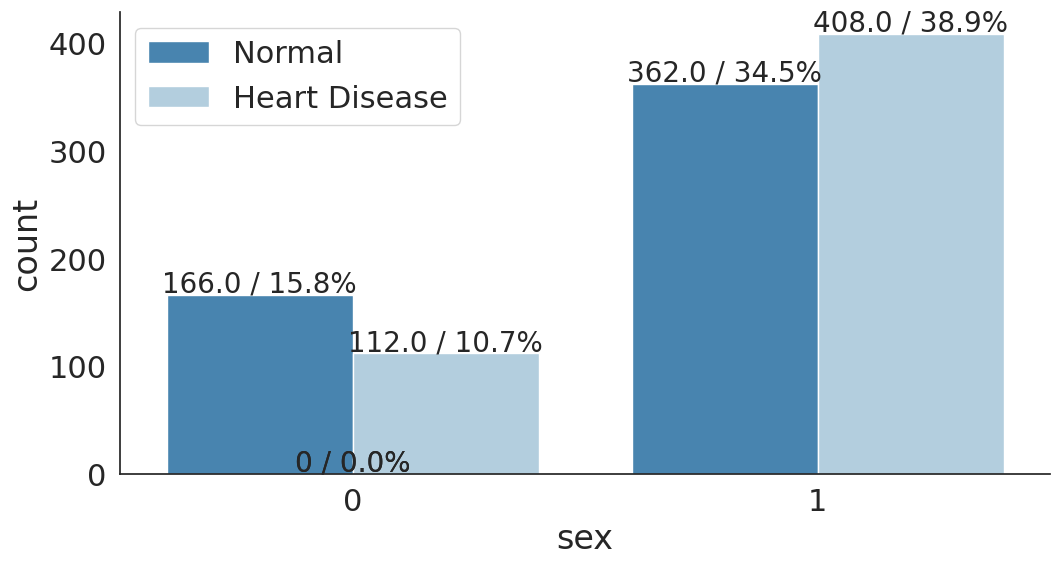

In [ ]:
total_cnt = data['target'].count()
labels = ['Normal','Heart Disease']
plt.figure(figsize=(12,6))
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(data=data, x='sex',hue='target',palette='Blues_r')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

In [ ]:
data[data['target']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
age,528.000000,51.852273,9.402902,28.000000,44.750000,53.000000,58.000000,77.000000
sex,528.000000,0.685606,0.464714,0.000000,0.000000,1.000000,1.000000,1.000000
chest pain type,528.000000,2.410985,1.061502,1.000000,2.000000,2.000000,3.000000,4.000000
resting bps,528.000000,131.270833,16.937561,94.000000,120.000000,130.000000,140.000000,200.000000
cholesterol,528.000000,241.988636,54.131156,85.000000,206.000000,236.000000,273.000000,564.000000
fasting blood sugar,528.000000,0.123106,0.328870,0.000000,0.000000,0.000000,0.000000,1.000000
resting ecg,528.000000,0.522727,0.754150,0.000000,0.000000,0.000000,1.000000,2.000000
max heart rate,528.000000,146.456439,23.371312,69.000000,131.750000,149.000000,163.000000,202.000000
exercise angina,528.000000,0.238636,0.426654,0.000000,0.000000,0.000000,0.000000,1.000000
oldpeak,528.000000,0.705303,1.026263,-0.100000,0.000000,0.000000,1.200000,6.200000


In [ ]:
data[data['target']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
age,520.000000,54.821154,9.162036,29.000000,48.000000,55.000000,61.000000,77.000000
sex,520.000000,0.784615,0.411485,0.000000,1.000000,1.000000,1.000000,1.000000
chest pain type,520.000000,3.230769,1.020321,1.000000,3.000000,4.000000,4.000000,4.000000
resting bps,520.000000,133.976923,17.705889,92.000000,120.000000,132.000000,142.000000,200.000000
cholesterol,520.000000,248.405769,59.845939,100.000000,211.000000,242.000000,279.250000,603.000000
fasting blood sugar,520.000000,0.201923,0.401822,0.000000,0.000000,0.000000,0.000000,1.000000
resting ecg,520.000000,0.692308,0.763787,0.000000,0.000000,1.000000,1.000000,2.000000
max heart rate,520.000000,139.326923,24.968359,71.000000,120.000000,140.000000,159.250000,202.000000
exercise angina,520.000000,0.500000,0.500481,0.000000,0.000000,0.500000,1.000000,1.000000
oldpeak,520.000000,1.183077,1.121700,0.000000,0.000000,1.000000,2.000000,6.200000


In [ ]:
numerical= data.drop(['target'], axis=1).select_dtypes('number').columns

categorical = data.select_dtypes('object').columns

print(f'Numerical Columns:  {data[numerical].columns}')
print('\n')
print(f'Categorical Columns: {data[categorical].columns}')


Numerical Columns:  Index(['age', 'sex', 'chest pain type', 'resting bps', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope'],
      dtype='object')


Categorical Columns: Index([], dtype='object')


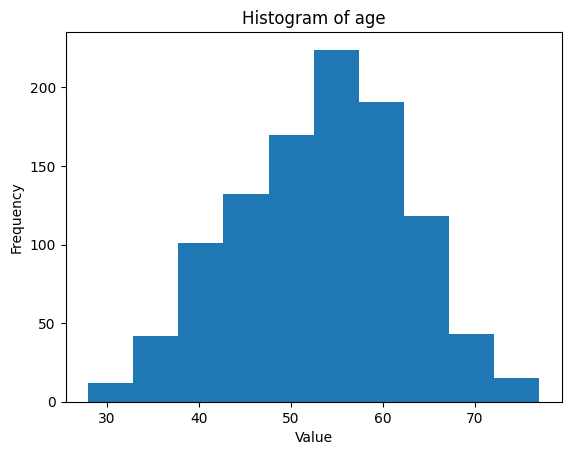

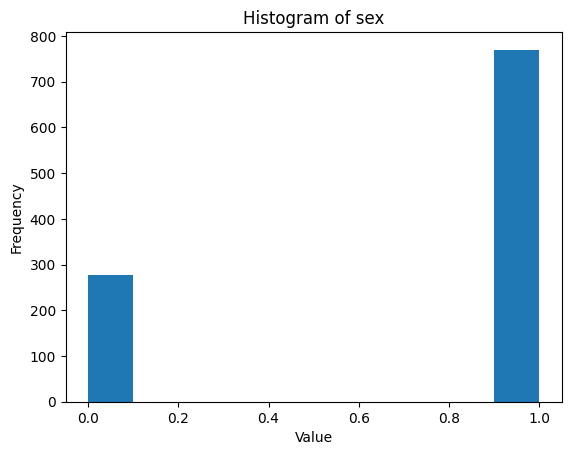

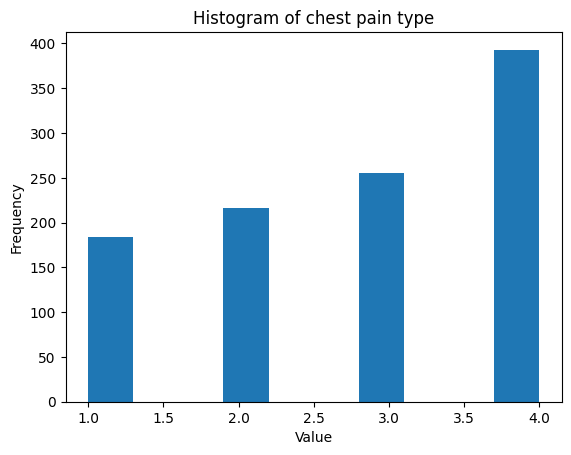

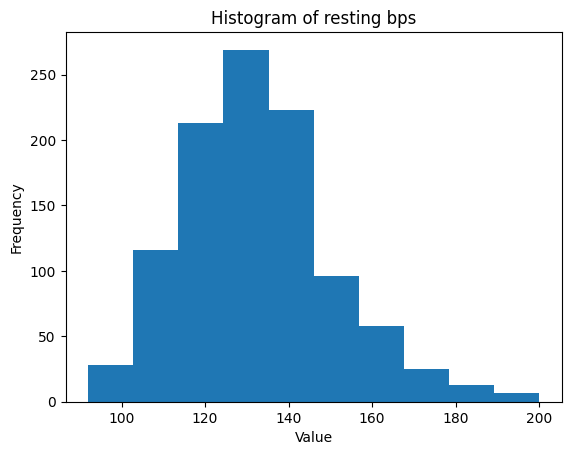

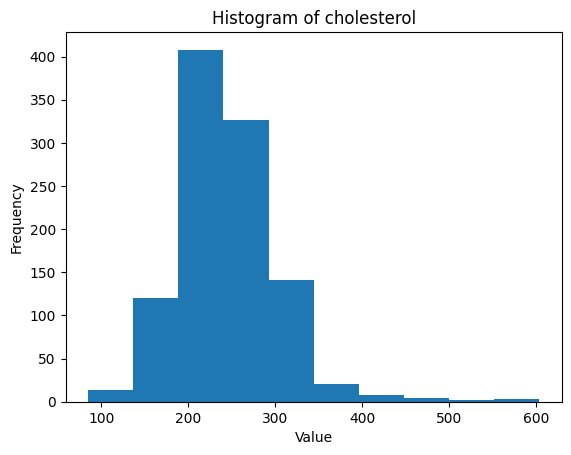

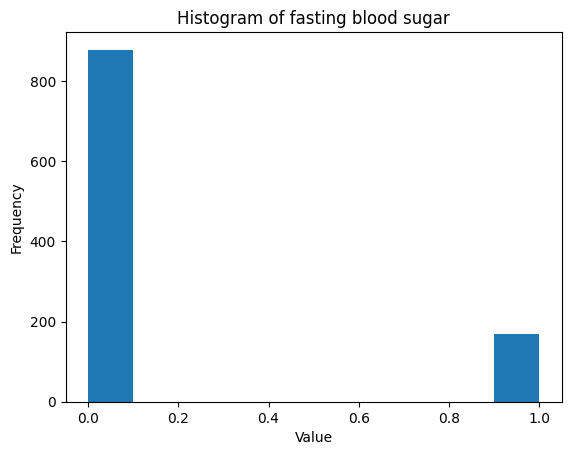

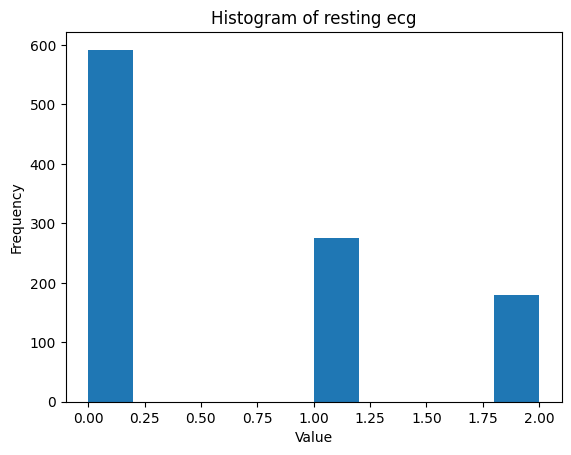

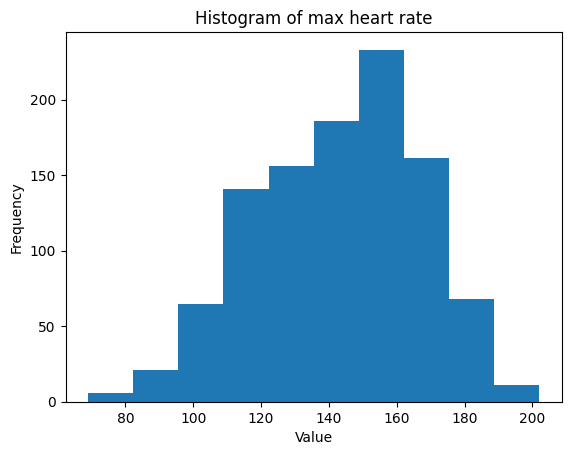

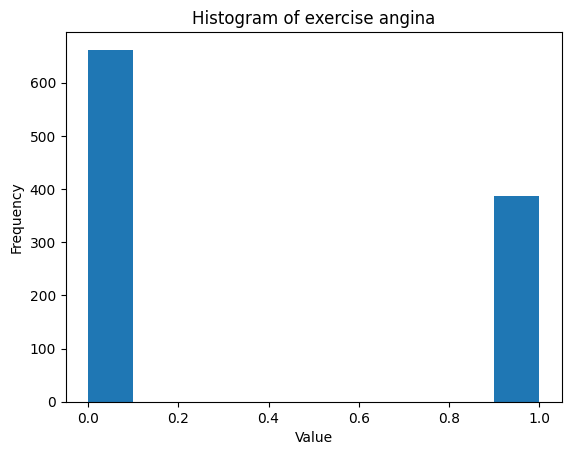

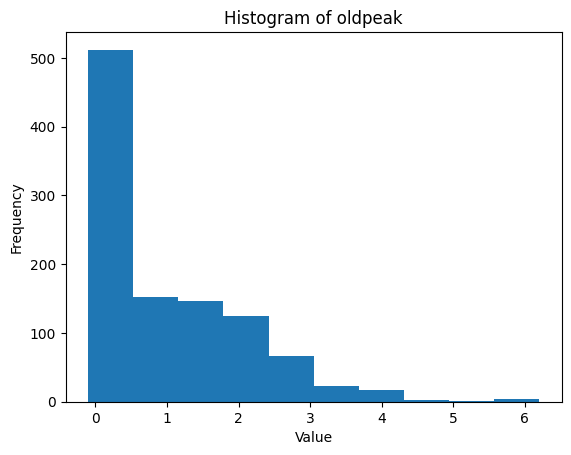

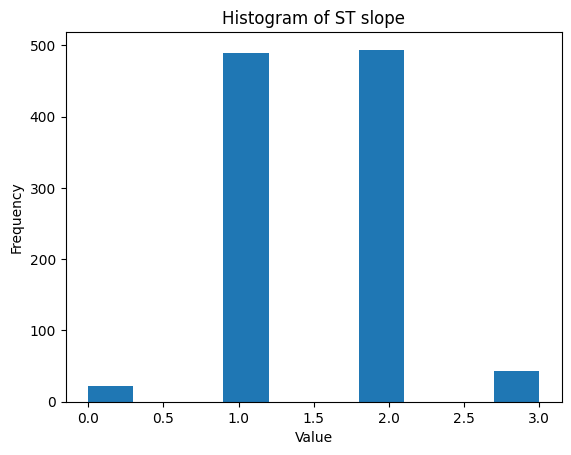

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'data' and a list of numerical columns named 'numerical'
# Replace 'numerical' with the actual list of numerical columns from your DataFrame
for column in numerical:
    plt.hist(data[column], bins=10)  # Adjust bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

**Random Forest Classifier**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from sklearn.preprocessing import LabelEncoder
data.head(2)

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,49,0,3,160,180.0,0,0,156,0,1.0,2,1


In [ ]:
li = ['sex','chest pain type','resting ecg','exercise angina','ST slope']
for i in li:
    data[i] = LabelEncoder().fit_transform(data[i])

<Axes: >

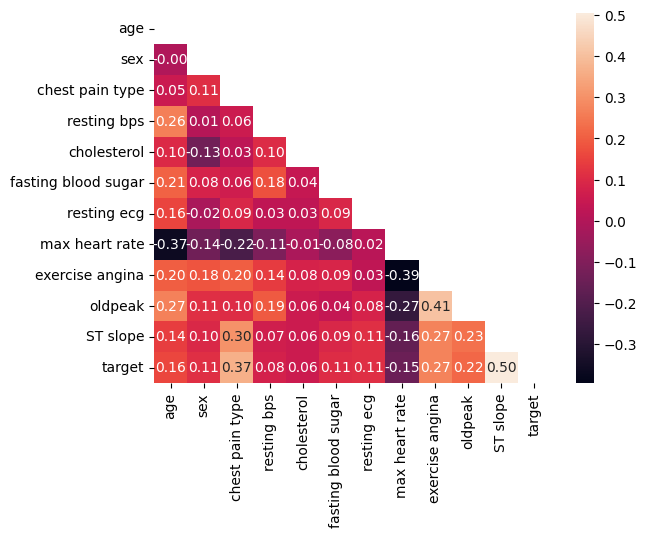

In [ ]:
sns.heatmap(data.corr(),annot=True,fmt ='.2f',mask = np.triu(data.corr()))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

outliers

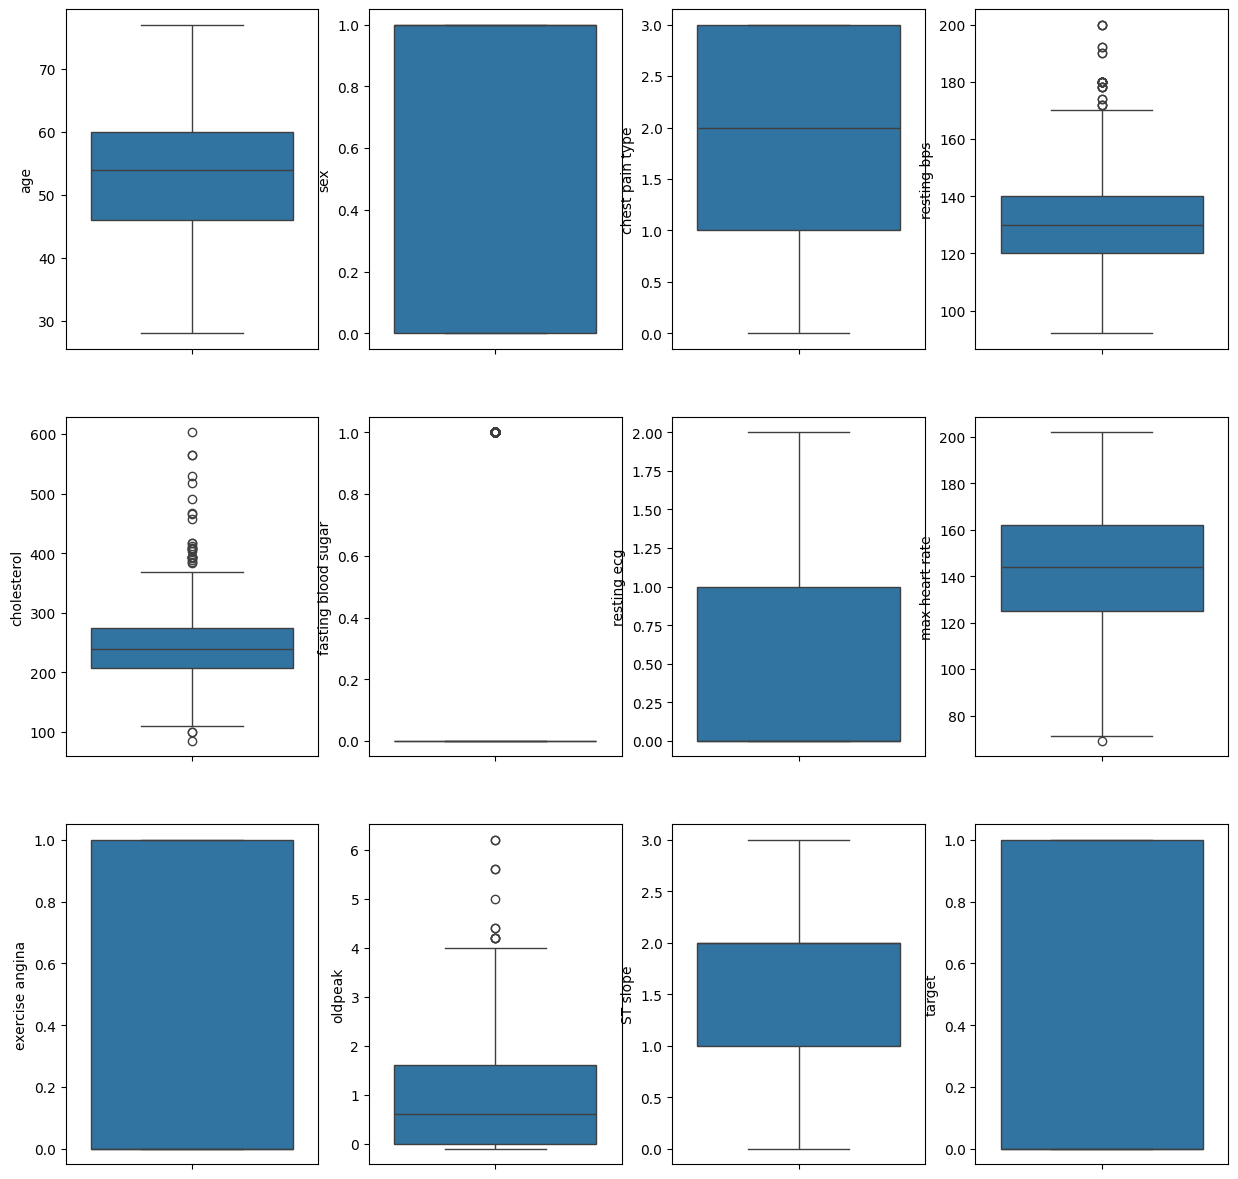

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(data.columns):
    plt.subplot(3,4,i[0]+1)
    sns.boxplot(data[i[1]])

In [ ]:
def remove(data):
  Q1 = np.percentile(data, 25, interpolation = 'midpoint')

# Third quartile (Q3)
  Q3 = np.percentile(data, 75, interpolation = 'midpoint')
  iqr = Q3 - Q1
  percentile25 = data.quantile(0.25)
  percentile75 = data.quantile(0.75)

  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  data = np.where(
    data > upper_limit,upper_limit,
    np.where(
        data < lower_limit,
        lower_limit,
        data
    )
  )
  return data

In [ ]:
li =['resting bps','cholesterol','max heart rate','oldpeak']
for i in li:
    data[i]=remove(data[i])

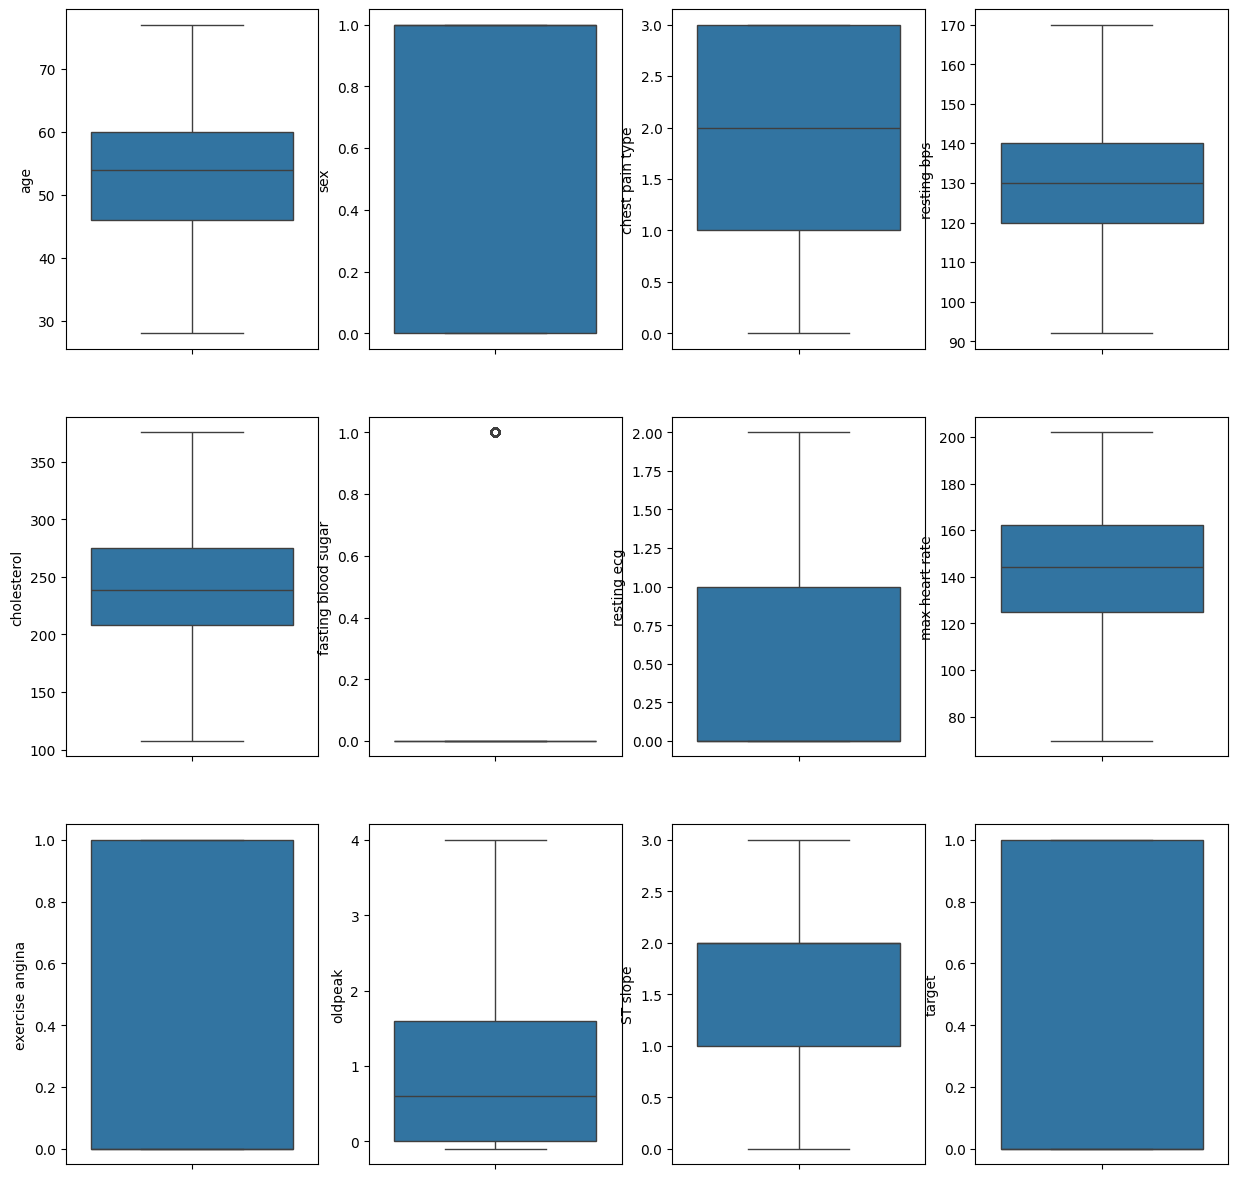

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(data.columns):
    plt.subplot(3,4,i[0]+1)
    sns.boxplot(data[i[1]])


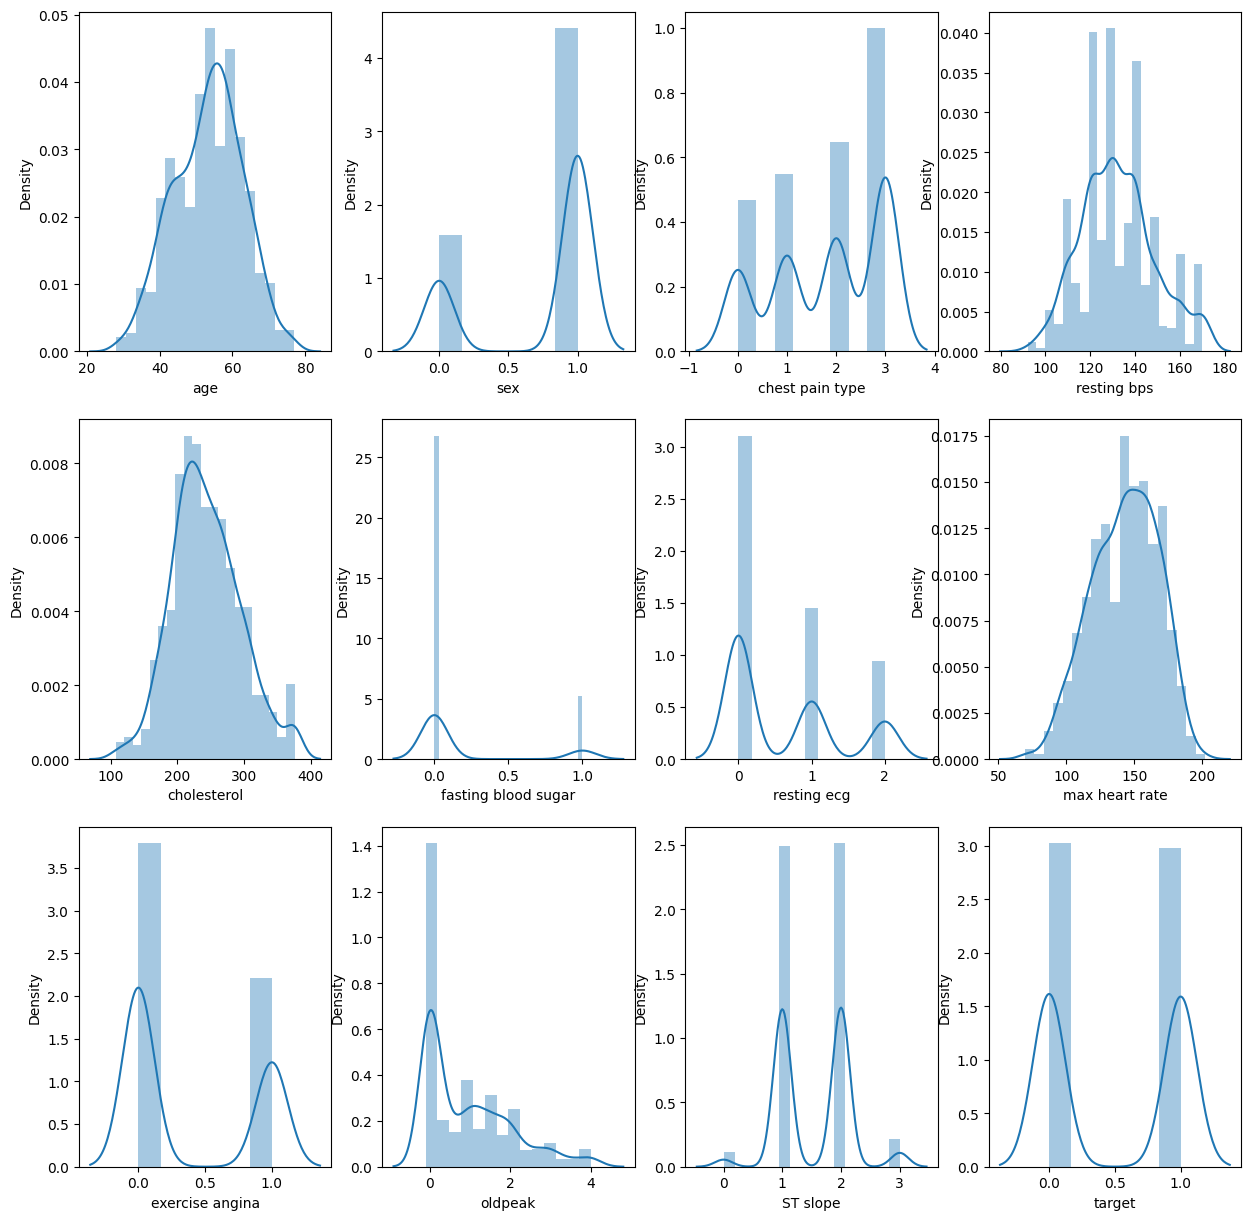

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(data.columns):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(data[i[1]])

In [ ]:
feature = data.drop('target',axis=1)
label = data['target']

In [ ]:
from sklearn.model_selection import train_test_split
trainF,testF,trainL,testL = train_test_split(feature,label,random_state=42,test_size=.2)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(trainF,trainL)
pred = model.predict(testF)
from sklearn.metrics import classification_report
print(classification_report(pred,testL))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        99
           1       0.79      0.76      0.77       111

    accuracy                           0.77       210
   macro avg       0.77      0.77      0.77       210
weighted avg       0.77      0.77      0.77       210



In [ ]:
label.value_counts()

0    528
1    520
Name: target, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
li = ['age','resting bps','cholesterol','max heart rate','oldpeak']
for i in li:
    feature[i] = StandardScaler().fit_transform(feature[[i]])

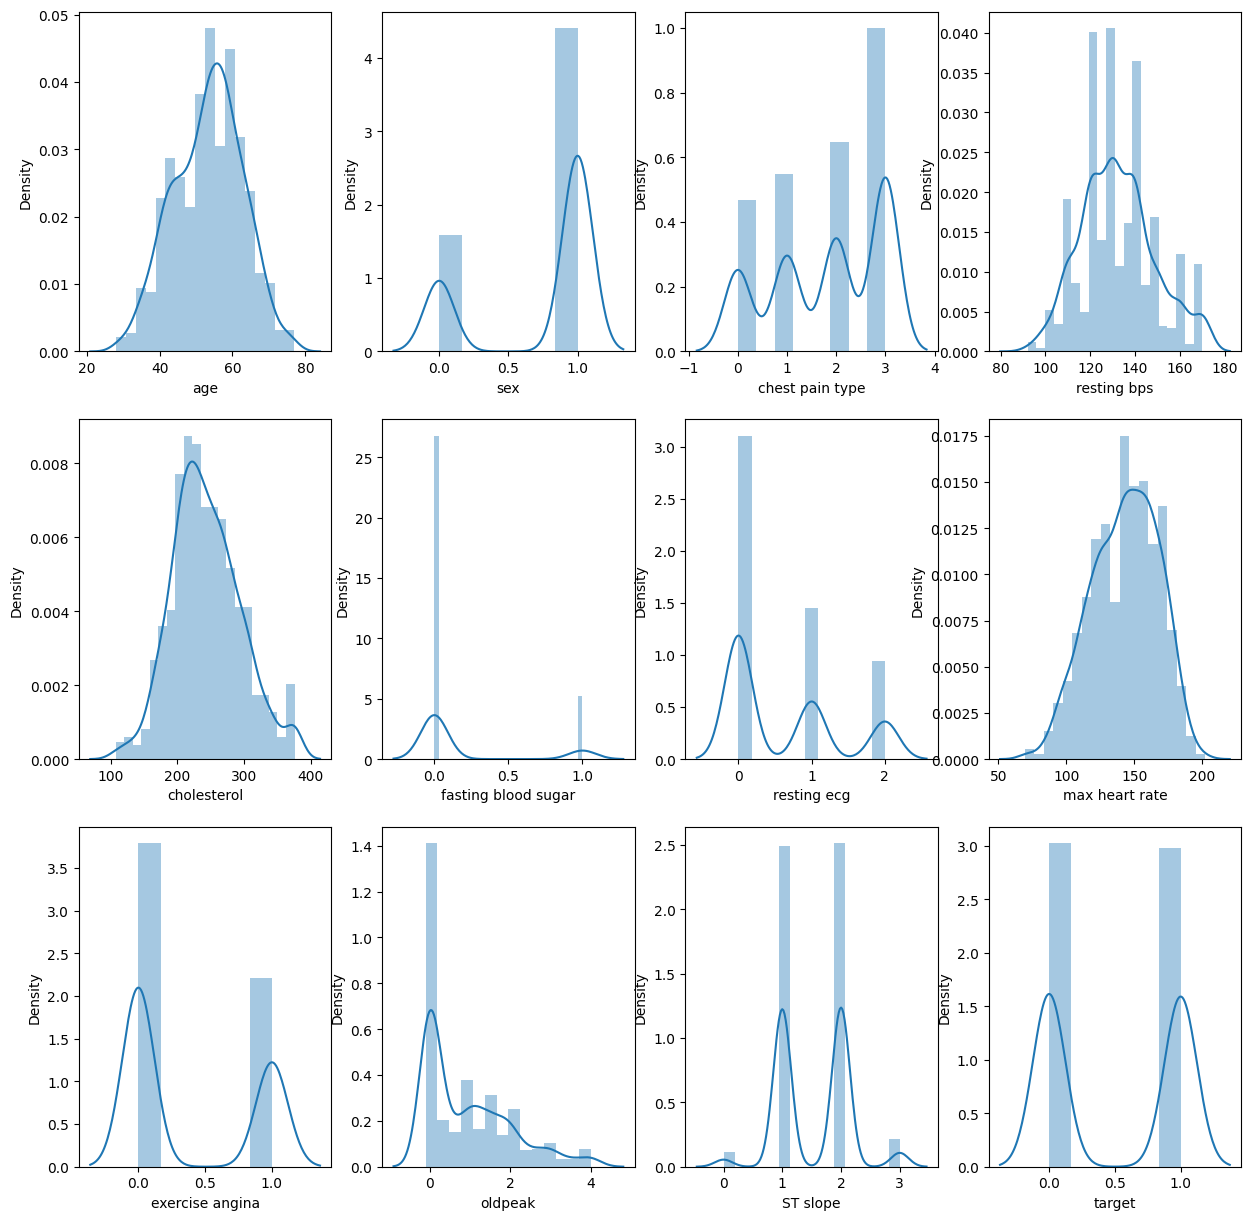

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(data.columns):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(data[i[1]])

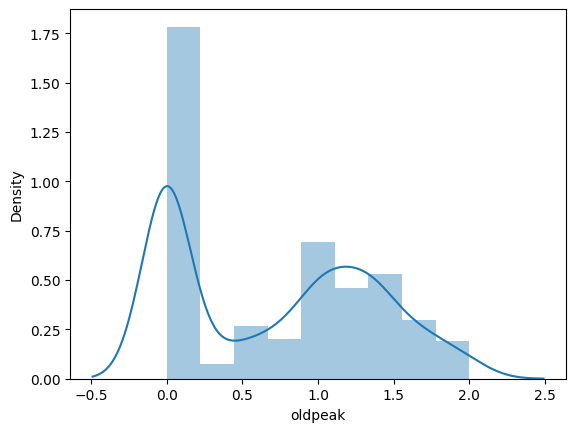

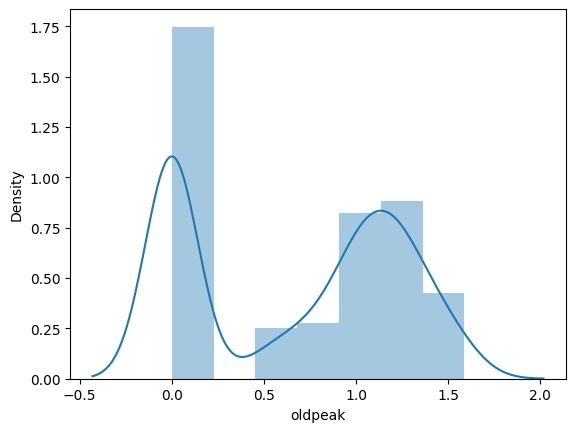

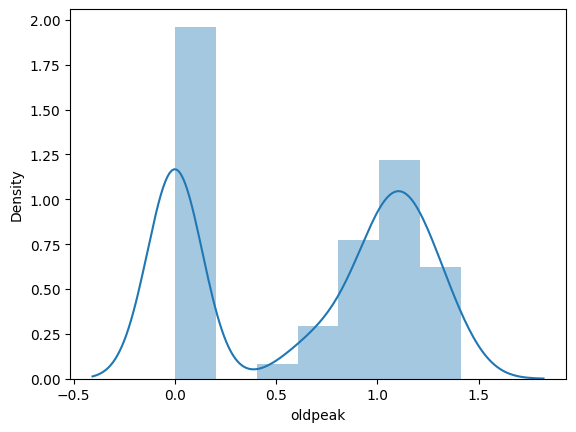

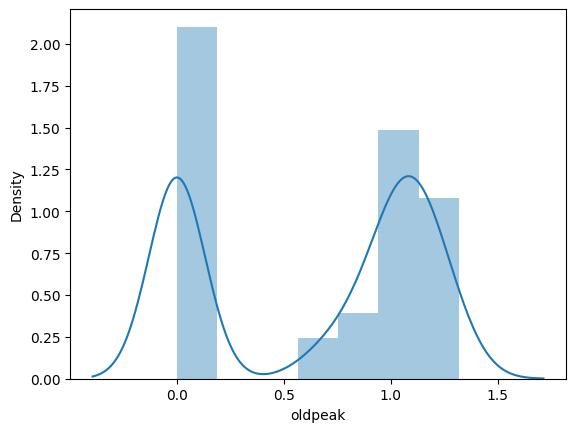

In [ ]:
for i in [2,3,4,5]:
    x = data['oldpeak']**(1/i)
    sns.distplot(x)
    plt.show()

data['oldpeak'] = data['oldpeak']**(1/3)

In [ ]:
data['target'].value_counts()

0    528
1    520
Name: target, dtype: int64

In [ ]:
from imblearn.combine  import SMOTEENN
os = SMOTEENN(random_state = 42)
feature,label = os.fit_resample(feature,label)

In [ ]:
from sklearn.model_selection import train_test_split
trainF,testF,trainL,testL = train_test_split(feature,label,random_state=42,test_size=.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
trainF, testF, trainL, testL = train_test_split(feature, label, random_state=42, test_size=.2)

# Initializing the Random Forest classifier
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)

# Training the model
RF_model.fit(trainF, trainL)

# Making predictions
y_pred = RF_model.predict(testF)

# Evaluating the model
print(classification_report(y_pred, testL))

# Calculating evaluation metrics
rf_f1 = f1_score(testL, y_pred)
rf_acc = accuracy_score(testL, y_pred)
rf_recall = recall_score(testL, y_pred)
rf_auc = roc_auc_score(testL, y_pred)


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.98      0.94      0.96        50

    accuracy                           0.96        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96



In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[x**2 for x in range(3,10)],
    'n_jobs':[-1,None],
    "random_state":[42,None]
}
cv = GridSearchCV(model,params,cv=5)
cv.fit(trainF,trainL)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [9, 16, 25, 36, 49, 64, 81],
                         'n_jobs': [-1, None], 'random_state': [42, None]})

In [ ]:
print(cv.best_score_)

0.9657894736842104


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, roc_auc_score

# Assuming 'feature' and 'label' are already defined
# Splitting the data into training and testing sets
trainF, testF, trainL, testL = train_test_split(feature, label, random_state=42, test_size=.2)

# Initializing the Decision Tree classifier
decision_tree_model = DecisionTreeClassifier()

# Training the model
decision_tree_model.fit(trainF, trainL)

# Making predictions
pred = decision_tree_model.predict(testF)

# Evaluating the model
print(classification_report(pred, testL))

# Calculating evaluation metrics
dt_f1 = f1_score(testL, pred)
dt_acc = accuracy_score(testL, pred)
dt_recall = recall_score(testL, pred)
dt_auc = roc_auc_score(testL, pred)


              precision    recall  f1-score   support

           0       0.96      0.90      0.93        51
           1       0.90      0.96      0.92        45

    accuracy                           0.93        96
   macro avg       0.93      0.93      0.93        96
weighted avg       0.93      0.93      0.93        96



logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, roc_auc_score

# Assuming 'feature' and 'label' are already defined
# Splitting the data into training and testing sets
trainF, testF, trainL, testL = train_test_split(feature, label, random_state=42, test_size=.2)

# Initializing the logistic regression model
logistic_model = LogisticRegression()

# Training the model
logistic_model.fit(trainF, trainL)

# Making predictions
pred = logistic_model.predict(testF)

# Evaluating the model
print(classification_report(pred, testL))

# Calculating evaluation metrics
log_f1 = f1_score(testL, pred)
log_acc = accuracy_score(testL, pred)
log_recall = recall_score(testL, pred)
log_auc = roc_auc_score(testL, pred)


              precision    recall  f1-score   support

           0       0.98      0.94      0.96        50
           1       0.94      0.98      0.96        46

    accuracy                           0.96        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96



gradient boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, roc_auc_score

# Assuming 'feature' and 'label' are already defined
# Splitting the data into training and testing sets
trainF, testF, trainL, testL = train_test_split(feature, label, random_state=42, test_size=.2)

# Initializing the Gradient Boosting classifier
gradient_boosting_model = GradientBoostingClassifier()

# Training the model
gradient_boosting_model.fit(trainF, trainL)

# Making predictions
pred = gradient_boosting_model.predict(testF)

# Evaluating the model
print(classification_report(pred, testL))

# Calculating evaluation metrics
gb_f1 = f1_score(testL, pred)
gb_acc = accuracy_score(testL, pred)
gb_recall = recall_score(testL, pred)
gb_auc = roc_auc_score(testL, pred)


              precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.96      0.94      0.95        49

    accuracy                           0.95        96
   macro avg       0.95      0.95      0.95        96
weighted avg       0.95      0.95      0.95        96



svm

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, roc_auc_score

# Assuming 'feature' and 'label' are already defined
# Splitting the data into training and testing sets
trainF, testF, trainL, testL = train_test_split(feature, label, random_state=42, test_size=.2)

# Initializing the SVM classifier
svm_model = SVC()

# Training the model
svm_model.fit(trainF, trainL)

# Making predictions
pred = svm_model.predict(testF)

# Evaluating the model
print(classification_report(pred, testL))

# Calculating evaluation metrics
svm_f1 = f1_score(testL, pred)
svm_acc = accuracy_score(testL, pred)
svm_recall = recall_score(testL, pred)
svm_auc = roc_auc_score(testL, pred)


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.98      0.94      0.96        50

    accuracy                           0.96        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96



XGboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, roc_auc_score

# Assuming 'feature' and 'label' are already defined
# Splitting the data into training and testing sets
trainF, testF, trainL, testL = train_test_split(feature, label, random_state=42, test_size=.2)

# Convert data into DMatrix format
dtrain = xgb.DMatrix(trainF, label=trainL)
dtest = xgb.DMatrix(testF)

# Parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Training the XGBoost model
num_round = 100
xgb_model = xgb.train(params, dtrain, num_round)

# Making predictions
pred_probs = xgb_model.predict(dtest)
pred = [1 if x > 0.5 else 0 for x in pred_probs]

# Evaluating the model
print(classification_report(testL, pred))

# Calculating evaluation metrics
xgb_grid_f1 = f1_score(testL, pred)
xgb_grid_acc = accuracy_score(testL, pred)
xgb_grid_recall = recall_score(testL, pred)
xgb_grid_auc = roc_auc_score(testL, pred)


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        48
           1       0.94      0.94      0.94        48

    accuracy                           0.94        96
   macro avg       0.94      0.94      0.94        96
weighted avg       0.94      0.94      0.94        96



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, roc_auc_score

# Assuming 'feature' and 'label' are already defined
# Splitting the data into training and testing sets
trainF, testF, trainL, testL = train_test_split(feature, label, random_state=42, test_size=.2)

# Initializing the KNN classifier
knn_model = KNeighborsClassifier()

# Training the model
knn_model.fit(trainF, trainL)

# Making predictions
pred = knn_model.predict(testF)

# Evaluating the model
print(classification_report(pred, testL))

# Calculating evaluation metrics
knn_f1 = f1_score(testL, pred)
knn_acc = accuracy_score(testL, pred)
knn_recall = recall_score(testL, pred)
knn_auc = roc_auc_score(testL, pred)


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        51
           1       0.94      1.00      0.97        45

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96



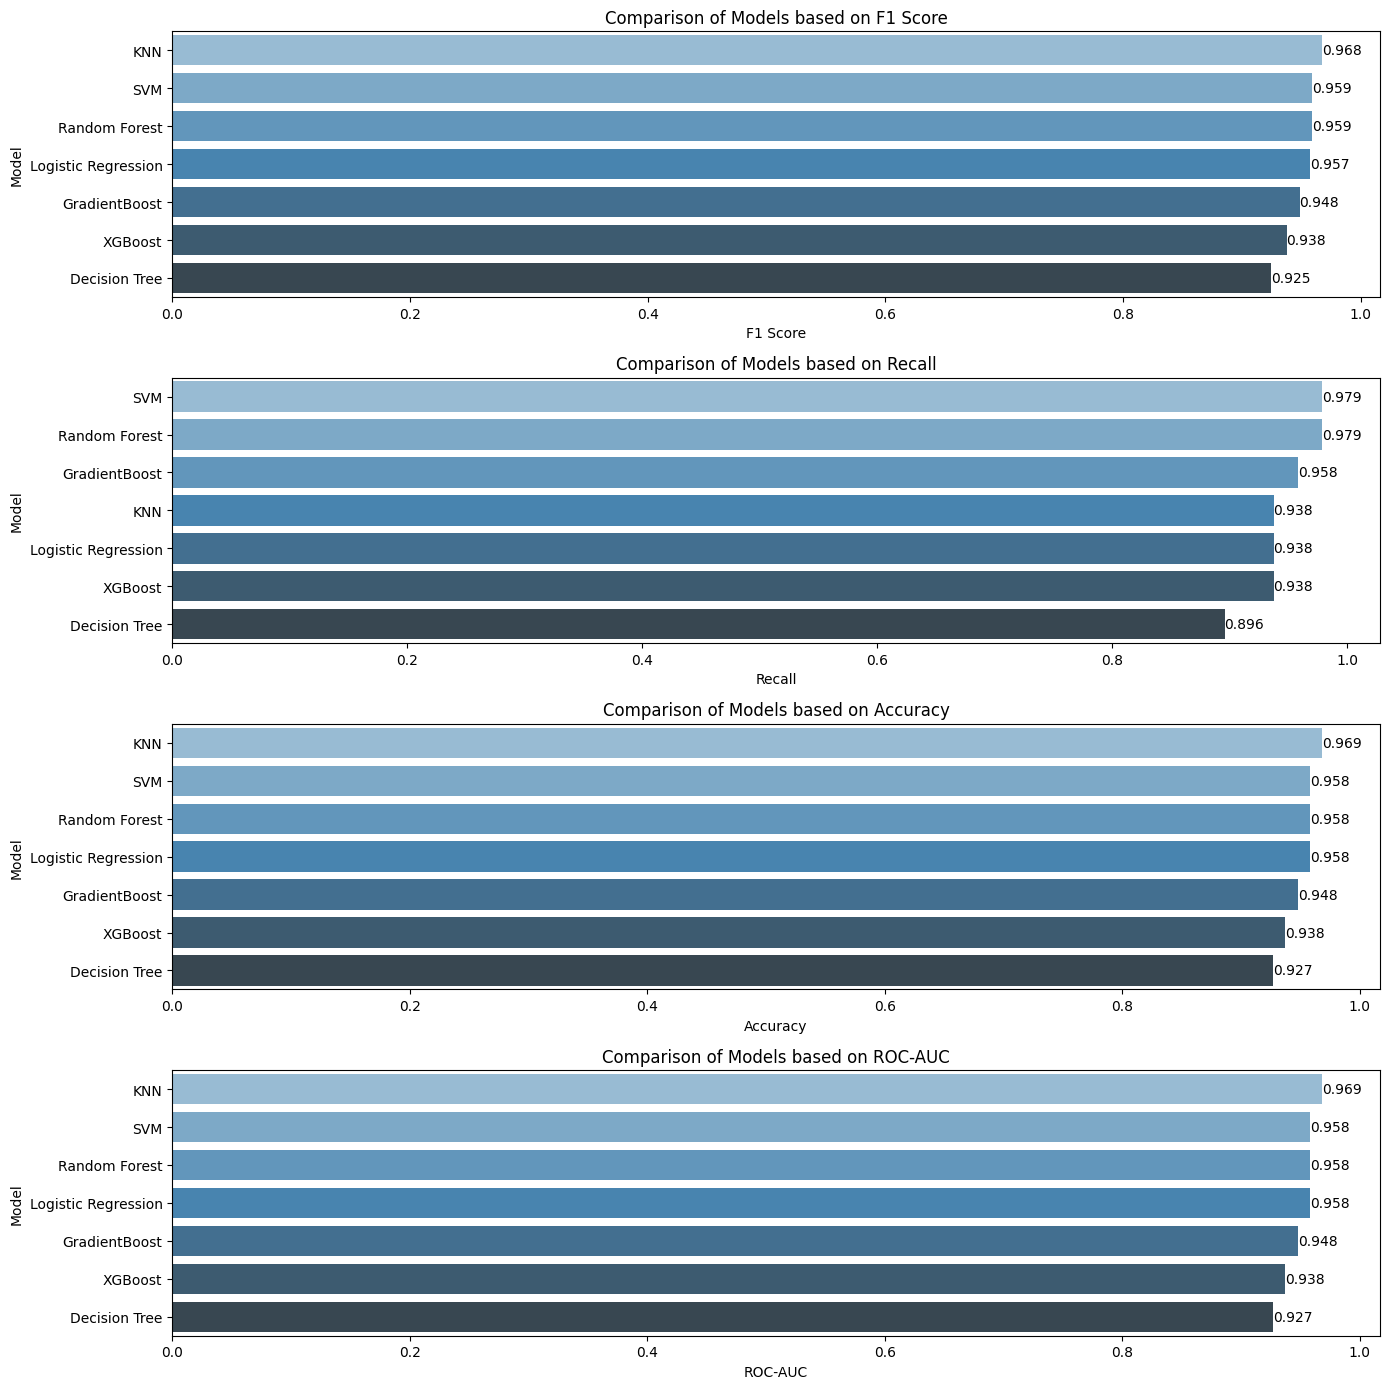

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create DataFrame with model names and their corresponding metrics
compare = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "KNN", "Decision Tree", "Random Forest","GradientBoost", "XGBoost"],
    "F1": [log_f1,svm_f1,knn_f1, dt_f1, rf_f1, gb_f1, xgb_grid_f1],
    "Recall": [log_recall, svm_recall, knn_recall, dt_recall, rf_recall, gb_recall, xgb_grid_recall],
    "Accuracy": [log_acc, svm_acc, knn_acc, dt_acc, rf_acc, gb_acc, xgb_grid_acc],
    "ROC_AUC": [log_auc, svm_auc, knn_auc, dt_auc, rf_auc, gb_auc,xgb_grid_auc]
})

# Define a function to label the bars in the plot
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha='left',                           # horizontal alignment
                va='center')                         # vertical alignment

# Create subplots for each metric comparison
plt.figure(figsize=(14, 14))

plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.title('Comparison of Models based on F1 Score')

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.xlabel('Recall')
plt.ylabel('Model')
plt.title('Comparison of Models based on Recall')

plt.subplot(413)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Comparison of Models based on Accuracy')

plt.subplot(414)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax = sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.xlabel('ROC-AUC')
plt.ylabel('Model')
plt.title('Comparison of Models based on ROC-AUC')

plt.tight_layout()
plt.show()
